In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

- [ ] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import time

# Загрузка данных
data = pd.read_csv('gym_members_exercise_tracking.csv') # https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

# Первичный просмотр данных
data.head()

,Age,Gender,Weight_in_kg,Height_in_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_in_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_in_liters,Workout_Frequency_in_days_on_week,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                973 non-null    int64  
 1   Gender                             973 non-null    object 
 2   Weight_in_kg                       973 non-null    float64
 3   Height_in_m                        973 non-null    float64
 4   Max_BPM                            973 non-null    int64  
 5   Avg_BPM                            973 non-null    int64  
 6   Resting_BPM                        973 non-null    int64  
 7   Session_Duration_in_hours          973 non-null    float64
 8   Calories_Burned                    973 non-null    float64
 9   Workout_Type                       973 non-null    object 
 10  Fat_Percentage                     973 non-null    float64
 11  Water_Intake_in_liters             973 non-null    float64

In [102]:
data.Workout_Frequency_in_days_on_week.unique() # Признак категориальный

array([4, 3, 5, 2])

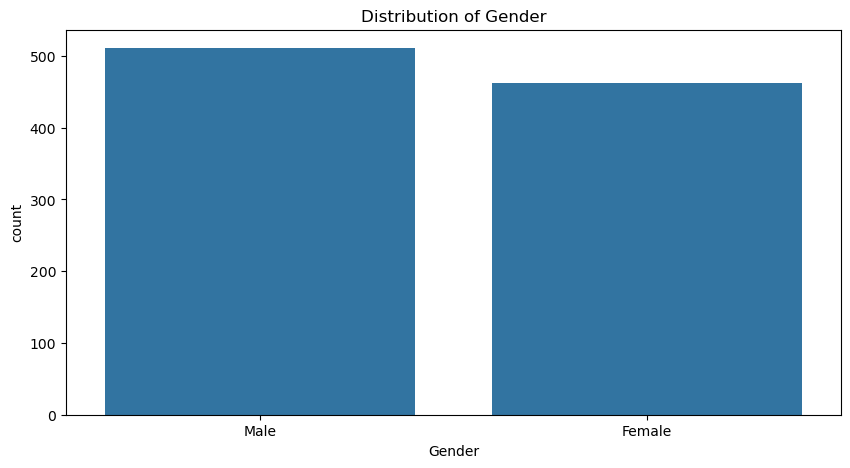

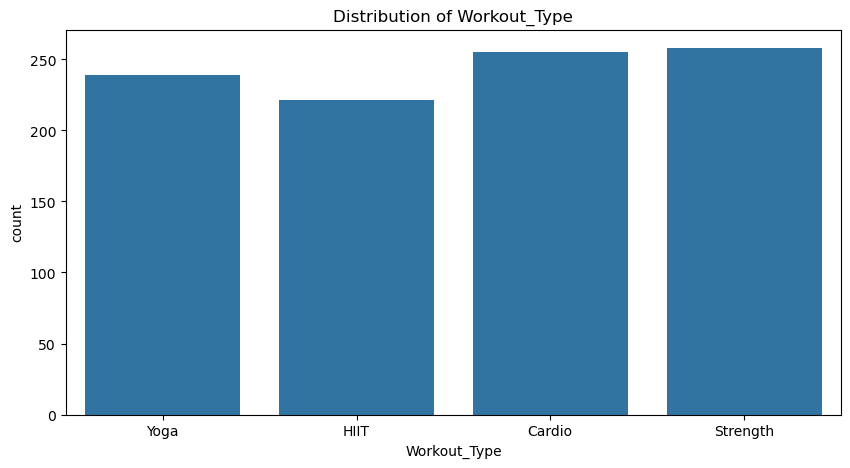

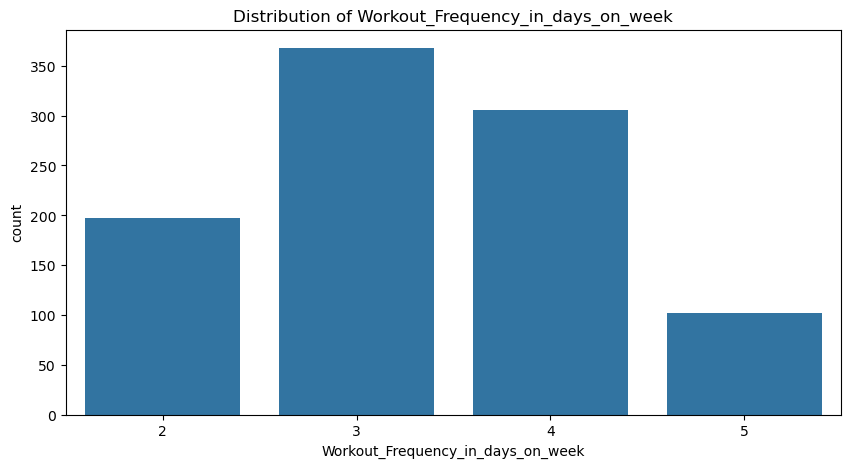

In [103]:
# Статистика и распределения категориальных признаков
categorical_cols = ['Gender','Workout_Type','Workout_Frequency_in_days_on_week']

# Построение гистограмм для категориальных признаков
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()


In [104]:
# Преобразование категориальных признаков в числовые
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Разделение признаков и целевых меток
y = data['Workout_Type']
X = data.drop('Workout_Type', axis=1)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)


In [105]:
data.head()

,Age,Gender,Weight_in_kg,Height_in_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_in_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_in_liters,Workout_Frequency_in_days_on_week,Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,2,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,2,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,2,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,1,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,1,1,14.39


- [ ] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [ ] Замерить время обучения каждой модели для каждой стратегии.
- [ ] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [ ] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

In [106]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
data.fillna(data.mean(), inplace=True)  # Для числовых данных
data.dropna(inplace=True)  # Удалить строки с NaN

In [108]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Список базовых алгоритмов
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Стратегии
strategies = {
    'OneVsRest': OneVsRestClassifier,
    'OneVsOne': OneVsOneClassifier,
    'OutputCode': OutputCodeClassifier
}

results = {}

# Обучение моделей с разными стратегиями
for strategy_name, strategy in strategies.items():
    print(f"Стратегия: {strategy_name}")
    for model_name, model in models.items():
        start_time = time.time()

        # Создание и обучение модели
        clf = strategy(model)
        clf.fit(X_train_scaled, y_train)
        
        # Оценка модели
        try:
            # Если стратегия поддерживает predict_proba
            y_pred_proba = clf.predict_proba(X_test_scaled)
            auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        except AttributeError:
            # Для OneVsOneClassifier или если predict_proba недоступен
            y_pred = clf.predict(X_test_scaled)
            auc = accuracy_score(y_test, y_pred)  # Используем accuracy как альтернативу AUC-ROC

        end_time = time.time()

        # Сохранение результатов
        results[(strategy_name, model_name)] = {
            'Score': auc,
            'Training Time': end_time - start_time
        }

        # Вывод отчета классификации
        print(f"{model_name} - Score: {auc:.3f}, Время обучения: {end_time - start_time:.2f} секунд")


Стратегия: OneVsRest
Logistic Regression - Score: 0.490, Время обучения: 0.03 секунд
SVM - Score: 0.477, Время обучения: 0.31 секунд
KNN - Score: 0.521, Время обучения: 0.02 секунд
Naive Bayes - Score: 0.490, Время обучения: 0.01 секунд
Стратегия: OneVsOne
Logistic Regression - Score: 0.250, Время обучения: 0.02 секунд
SVM - Score: 0.277, Время обучения: 0.16 секунд
KNN - Score: 0.288, Время обучения: 0.09 секунд
Naive Bayes - Score: 0.223, Время обучения: 0.01 секунд
Стратегия: OutputCode
Logistic Regression - Score: 0.236, Время обучения: 0.02 секунд
SVM - Score: 0.257, Время обучения: 0.44 секунд
KNN - Score: 0.281, Время обучения: 0.02 секунд
Naive Bayes - Score: 0.281, Время обучения: 0.01 секунд


# Вывод:
Самая эффективная классификация по всем стратегиям: **KNN**
## OnevsRest:
Самая эффективная классификация: **KNN**

Самая неэффективная классификация по времени: **SVM**

Самая неэффективная классификация по результатам: **SVM**
## OnevsOne:
Самая эффективная классификация: **KNN**

Самая неэффективная классификация по времени: **SVM**

Самая неэффективная классификация по результатам: **Naive Bayes**
## OutputCode
Самая эффективная классификация: **KNN**

Самая неэффективная классификация по времени: **SVM**

Самая неэффективная классификация по результатам: **Logistic Regression**

- [ ] * (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.

In [109]:
data = pd.read_csv('gym_members_exercise_tracking.csv')
categorical_cols = ['Gender','Workout_Type','Workout_Frequency_in_days_on_week']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

y_multilabel = data[['Gender_Male', 'Workout_Type_Yoga', 'Workout_Type_Strength']]
X = data.drop(['Gender_Male', 'Workout_Type_Yoga', 'Workout_Type_Strength'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_multilabel, test_size=0.2, random_state=99)

In [110]:
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.metrics import roc_auc_score

# Определение моделей для многометочной классификации
multi_label_models = {
    'MultiOutputClassifier': MultiOutputClassifier(LogisticRegression()),
    'ClassifierChain': ClassifierChain(LogisticRegression())
}

# Обучение и оценка моделей
for model_name, model in multi_label_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Оценка качества с AUC-ROC
    auc_score = roc_auc_score(y_test, y_pred, average='macro')
    print(f"{model_name}: AUC-ROC = {auc_score:.2f}")

MultiOutputClassifier: AUC-ROC = 0.62
ClassifierChain: AUC-ROC = 0.62


- [ ] * (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.

In [111]:
data = pd.read_csv('gym_members_exercise_tracking.csv')
categorical_cols = ['Gender','Workout_Type','Workout_Frequency_in_days_on_week']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data.head()
y_multioutput = data[['Gender_Male', 'Workout_Type_Yoga', 'Workout_Type_Strength']]
X_train, X_test, y_train, y_test = train_test_split(X, y_multioutput, test_size=0.2, random_state=99)


In [112]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Определение моделей для многовыходной регрессии
multioutput_models = {
    'MultiOutputRegressor': MultiOutputRegressor(Ridge()),
    'RegressorChain': RegressorChain(Ridge())
}

# Обучение и оценка моделей
for model_name, model in multioutput_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Оценка качества с метрикой R2
    r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
    print(f"{model_name}: R2 = {r2:.2f}")


MultiOutputRegressor: R2 = 0.29
RegressorChain: R2 = 0.29
